<a href="https://colab.research.google.com/github/kiennggg/Giua-ki-lap-trinh/blob/main/Nh%C3%B3m_9_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![anh](https://i.imgur.com/utSdaaC.png)

# <font color="#1b74cc">**NHÓM 9 | PROJECT GIỮA KỲ** </font>
## <font color="#f5c351"> __Xác định các yếu tố ảnh hưởng đến doanh thu bán hàng và dự báo doanh thu trong giai đoạn 2012 - 2013 cho Walmart__ </font>


# <font color="#1b74cc"> 1. Lời Mở Đầu </font>

Tập đoàn Walmart, với mạng lưới phân phối rộng lớn trên toàn cầu, là một biểu tượng không thể không nhắc đến trong ngành bán lẻ. Nhóm được cung cấp dữ liệu bán hàng lịch sử cho 45 cửa hàng Walmart tại các khu vực khác nhau. Mỗi cửa hàng bao gồm một số bộ phận (Department):

1. ___stores.csv:___ File chứa thông tin về 45 cửa hàng, chỉ ra loại (Type) và kích thước (Size) của cửa hàng.
2. ___test.csv:___ File này giống hệt với train.csv, ngoại trừ việc không có thông tin về doanh thu bán hàng hàng tuần đã bị ẩn. Nhóm sẽ phải dự báo doanh thu bán hàng cho file này.
3. ___train.csv:___ File này gồm các dữ liệu từ quá khứ, bao gồm từ ngày 05-02-2010 đến 01-11-2012. Trong file này, có các trường thông tin sau:
- Store - số hiệu cửa hàng
- Dept - số hiệu bộ phận
- Date - tuần
- Weekly_Sales - doanh thu bán hàng hàng tuần cho bộ phận đã cho tại cửa hàng đã cho
- IsHoliday - liệu tuần đó có phải là tuần lễ đặc biệt không.
    
4. ___features.csv:___ File này chứa dữ liệu bổ sung liên quan đến cửa hàng, bộ phận và một số chỉ số khu vực. Các thông tin bao gồm:
- Store - số hiệu cửa hàng
- Date - tuần
- Temperature - nhiệt độ trung bình trong khu vực
- Fuel_Price - giá nhiên liệu trong khu vực
- MarkDown1-5 - dữ liệu ẩn danh liên quan đến các đợt giảm giá quảng cáo mà Walmart đang thực hiện. Dữ liệu MarkDown chỉ có sẵn sau tháng 11 năm 2011 và không luôn có sẵn cho tất cả các cửa hàng. Bất kỳ giá trị nào bị thiếu đều được đánh dấu là NA.
- CPI - chỉ số giá tiêu dùng
- Unemployment - tỷ lệ thất nghiệp
- IsHoliday - liệu tuần đó có phải là tuần lễ đặc biệt không

Với các dữ liệu như trên, nhóm quyết định lựa chọn đề tài: ___"Xác định các yếu tố ảnh hưởng đến doanh thu bán hàng và dự báo doanh thu trong giai đoạn 2012 - 2013 cho Walmart"___. Việc dự báo doanh thu bán hàng là một yếu tố then chốt, giúp Walmart nói riêng và các tập đoàn bán lẻ nói chung điều chỉnh kế hoạch sản xuất, quản lý hàng tồn kho và đưa ra các chiến lược kinh doanh phù hợp. Một dự báo chính xác không chỉ giúp tối ưu hóa lợi nhuận, mà còn giảm thiểu rủi ro và tận dụng tối đa cơ hội. Trong bối cảnh thị trường ngày càng cạnh tranh, việc dự báo doanh thu chính xác trở thành chìa khóa quan trọng giúp Walmart duy trì và mở rộng vị thế của mình.
    

# <font color="#1b74cc">2. Tổng Quan Tình Hình Nghiên Cứu </font>
Trong thập kỷ qua, nhiều nghiên cứu đã được tiến hành để tìm hiểu các yếu tố ảnh hưởng đến doanh thu bán hàng của các chuỗi bán lẻ lớn như Walmart. Một số yếu tố chính đã được xác định bao gồm: kích thước cửa hàng, loại cửa hàng, nhiệt độ, giá nhiên liệu, chỉ số giá tiêu dùng (CPI), tỷ lệ thất nghiệp, và việc có phải tuần lễ đặc biệt hay không.

Cụ thể, một số nghiên cứu đã chỉ ra rằng kích thước cửa hàng có ảnh hưởng đáng kể đến doanh thu bán hàng. Theo HR, G; Aithal, P. S. và P, Kirubadevi (2020), kích thước cửa hàng có thể ảnh hưởng đến số lượng và loại sản phẩm mà một cửa hàng có thể trưng bày. Cửa hàng lớn hơn có thể trưng bày nhiều sản phẩm hơn, thu hút nhiều khách hàng hơn và do đó tăng doanh thu. Ngoài ra, cửa hàng lớn hơn cũng có thể tạo ra trải nghiệm mua sắm thoải mái hơn cho khách hàng, làm tăng khả năng họ sẽ mua nhiều sản phẩm hơn trong mỗi lần mua sắm. Loại cửa hàng, đặc biệt là kích thước và quy mô của nó, được xem là một yếu tố quan trọng ảnh hưởng đến doanh thu bán hàng. Theo Nilsson (2015), các cửa hàng siêu thị thường có doanh thu cao hơn so với các cửa hàng nhỏ hơn. Điều này có thể được giải thích bằng việc các cửa hàng siêu thị thường cung cấp một loạt các sản phẩm và dịch vụ rộng lớn, từ thực phẩm tươi sống đến đồ gia dụng, quần áo, và nhiều hơn nữa. Điều này không chỉ thu hút một lượng lớn khách hàng với nhu cầu đa dạng, mà còn tạo ra nhiều cơ hội hơn để bán hàng. Ngoài ra, các cửa hàng siêu thị thường có các chương trình khuyến mãi và giảm giá mạnh mẽ, thu hút khách hàng và tăng doanh thu.

Nhiệt độ và giá nhiên liệu cũng được xem là những yếu tố quan trọng. Một số nghiên cứu đã chỉ ra rằng khi nhiệt độ tăng lên, doanh thu bán hàng thường giảm, có thể do khách hàng không muốn ra khỏi nhà khi thời tiết nóng (Brigitte Roth Tran, 2022). Khi giá nhiên liệu tăng, nó có thể tạo ra một chuỗi các hiệu ứng tiêu cực đối với doanh thu bán hàng do chi phí đi lại của khách hàng tăng lên. Điều này không chỉ làm giảm khả năng của họ tiêu dùng cho các mặt hàng không thiết yếu, mà còn có thể khiến họ suy nghĩ hai lần trước khi quyết định đi đến cửa hàng để mua sắm, đặc biệt là nếu cửa hàng không nằm gần nhà. Như vậy, khi giá nhiên liệu tăng, nó không chỉ ảnh hưởng trực tiếp đến khả năng tiêu dùng của khách hàng, mà còn có thể tạo ra một loạt các hiệu ứng tiêu cực khác đối với doanh thu bán hàng (Dora G., 2007).

Chỉ số giá tiêu dùng (CPI) và tỷ lệ thất nghiệp cũng được xem là những yếu tố quan trọng. Khi CPI tăng, khách hàng có thể cắt giảm chi tiêu, dẫn đến giảm doanh thu bán hàng (Randy G., 2022). Tương tự, khi tỷ lệ thất nghiệp tăng, có nghĩa là một phần lớn người dân không có công việc ổn định để kiếm sống. Điều này dẫn đến việc họ có ít tiền để tiêu dùng hơn so với khi họ có việc làm. Khi thu nhập giảm, người dân thường cắt giảm chi tiêu không cần thiết, điều này bao gồm cả việc mua sắm tại các cửa hàng bán lẻ như Walmart, doanh thu bán hàng có thể giảm. Điều này không chỉ ảnh hưởng đến lợi nhuận của công ty, mà còn ảnh hưởng đến khả năng mở rộng kinh doanh, tạo việc làm mới, và đầu tư vào cải tiến sản phẩm và dịch vụ. Điều này cũng có thể tạo ra một chuỗi phản ứng, khi mà việc cắt giảm chi tiêu của người tiêu dùng dẫn đến giảm doanh thu, buộc các doanh nghiệp phải cắt giảm chi phí, có thể dẫn đến việc sa thải nhân viên, làm tăng tỷ lệ thất nghiệp và tiếp tục làm giảm chi tiêu của người tiêu dùng (Ilya M., 2020).

Cuối cùng, việc có phải tuần lễ đặc biệt hay không cũng có thể ảnh hưởng đến doanh thu bán hàng. Các nghiên cứu đã chỉ ra rằng trong các mùa bán hàng lớn như mùa Giáng sinh, Black Friday, hoặc các kỳ nghỉ lễ khác thường tạo ra sự tăng trưởng mạnh mẽ trong doanh thu bán hàng. Ngược lại, những thời điểm ít sự kiện có thể dẫn đến doanh thu bán hàng thấp hơn (Felix R., 2023).

Tuy nhiên, mặc dù những yếu tố này đã được xác định là quan trọng, nhưng mối quan hệ giữa chúng và doanh thu bán hàng có thể thay đổi tùy thuộc vào nhiều yếu tố khác như vị trí cửa hàng, thị trường cụ thể, và thời điểm trong năm.

Dựa vào cơ sở lý thuyết nêu trên, nhóm 9 quyết định dùng các biến sau: "Store", "Date", "Type", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size", "IsHoliday" và nghiên cứu ảnh hưởng của chúng lên doanh thu bán hàng của Walmart.

# <font color="#1b74cc">3. Tiền Xử Lý Dữ Liệu </font>

## <font color="#f5c351">3.1. Import thư viện Python cần thiết </font>

In [ ]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings("ignore")

## <font color="#f5c351">3.2. Đọc bộ dữ liệu </font>

In [ ]:
#Đọc dữ liệu
train = pd.read_csv("https://raw.githubusercontent.com/kiennggg/Giua-ki-lap-trinh/main/train.csv")
features = pd.read_csv('https://raw.githubusercontent.com/kiennggg/Giua-ki-lap-trinh/main/features.csv')
test = pd.read_csv('https://raw.githubusercontent.com/kiennggg/Giua-ki-lap-trinh/main/test.csv')
stores = pd.read_csv('https://raw.githubusercontent.com/kiennggg/Giua-ki-lap-trinh/main/stores.csv')

In [ ]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
# Hợp nhất dataset 'train', 'stores' và 'features'
dataset = train.merge(stores, how='left').merge(features,how='left')
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [ ]:
# Tổng hợp dữ liệu theo từng cửa hàng theo từng tuần
grouped_dataset = dataset.groupby(["Store","Date","Type","Temperature","Fuel_Price","CPI","Unemployment","Size","IsHoliday"]).sum()
# Lựa chọn các biến để phân tích
main_data = grouped_dataset.drop(["Dept","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],axis =1)
main_data = pd.DataFrame(main_data)
main_data

Weekly_Sales
Store Date       Type Temperature Fuel_Price CPI        Unemployment Size   IsHoliday              
1     2010-02-05 A    42.31       2.572      211.096358 8.106        151315 False        1643690.90
      2010-02-12 A    38.51       2.548      211.242170 8.106        151315 True         1641957.44
      2010-02-19 A    39.93       2.514      211.289143 8.106        151315 False        1611968.17
      2010-02-26 A    46.63       2.561      211.319643 8.106        151315 False        1409727.59
      2010-03-05 A    46.50       2.625      211.350143 8.106        151315 False        1554806.68
...                                                                                             ...
45    2012-09-28 B    64.88       3.997      192.013558 8.684        118221 False         713173.95
      2012-10-05 B    64.89       3.985      192.170412 8.667        118221 False         733455.07
      2012-10-12 B    54.47       4.000      192.327265 8.667        118221 False         734464.36
      2012-10-19 B    56.47       3.969      192.330854 8.667        118221 False         718125.53
      2012-10-26 B    58.85       3.882      192.308899 8.667        118221 False         760281.43

[6435 rows x 1 columns]

In [ ]:
# Biến đổi cột store từ index thành cột bình thường
main_data = main_data.reset_index()
main_data

,Store,Date,Type,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales
0,1,2010-02-05,A,42.31,2.572,211.096358,8.106,151315,False,1643690.90
1,1,2010-02-12,A,38.51,2.548,211.242170,8.106,151315,True,1641957.44
2,1,2010-02-19,A,39.93,2.514,211.289143,8.106,151315,False,1611968.17
3,1,2010-02-26,A,46.63,2.561,211.319643,8.106,151315,False,1409727.59
4,1,2010-03-05,A,46.50,2.625,211.350143,8.106,151315,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,B,64.88,3.997,192.013558,8.684,118221,False,713173.95
6431,45,2012-10-05,B,64.89,3.985,192.170412,8.667,118221,False,733455.07
6432,45,2012-10-12,B,54.47,4.000,192.327265,8.667,118221,False,734464.36
6433,45,2012-10-19,B,56.47,3.969,192.330854,8.667,118221,False,718125.53


In [ ]:
# Thay kiểu biến của IsHoliday thành kiểu Boolean
main_data["IsHoliday"] = main_data["IsHoliday"].replace({True: 1, False: 0})
main_data

,Store,Date,Type,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales
0,1,2010-02-05,A,42.31,2.572,211.096358,8.106,151315,0,1643690.90
1,1,2010-02-12,A,38.51,2.548,211.242170,8.106,151315,1,1641957.44
2,1,2010-02-19,A,39.93,2.514,211.289143,8.106,151315,0,1611968.17
3,1,2010-02-26,A,46.63,2.561,211.319643,8.106,151315,0,1409727.59
4,1,2010-03-05,A,46.50,2.625,211.350143,8.106,151315,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,B,64.88,3.997,192.013558,8.684,118221,0,713173.95
6431,45,2012-10-05,B,64.89,3.985,192.170412,8.667,118221,0,733455.07
6432,45,2012-10-12,B,54.47,4.000,192.327265,8.667,118221,0,734464.36
6433,45,2012-10-19,B,56.47,3.969,192.330854,8.667,118221,0,718125.53


In [ ]:
main_data.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03
mean,23.000000,60.663782,3.358607,171.578394,7.999151,130287.600000,0.069930,1.046965e+06
std,12.988182,18.444933,0.459020,39.356712,1.875885,63117.022465,0.255049,5.643666e+05
min,1.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,0.000000,2.099862e+05
25%,12.000000,47.460000,2.933000,131.735000,6.891000,70713.000000,0.000000,5.533501e+05
50%,23.000000,62.670000,3.445000,182.616521,7.874000,126512.000000,0.000000,9.607460e+05
75%,34.000000,74.940000,3.735000,212.743293,8.622000,202307.000000,0.000000,1.420159e+06
max,45.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,1.000000,3.818686e+06


## <font color="#f5c351">3.3. Làm sạch và tổ chức dữ liệu </font>

### <font color="#50b8d0">3.3.1. Kiểm tra dữ liệu bị thiếu </font>

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Type          6435 non-null   object 
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Size          6435 non-null   int64  
 8   IsHoliday     6435 non-null   int64  
 9   Weekly_Sales  6435 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 502.9+ KB


**Vậy bộ dữ liệu mà nhóm sẽ sử dụng không có giá trị bị thiếu.**

### <font color="#50b8d0">3.3.2. Kiểm tra Outliers </font>




In [ ]:
# Tạo dữ liệu gồm các biến dạng số để khảo sát các biến
num_data = main_data.drop(["Store","Date","Type","IsHoliday"],axis =1)

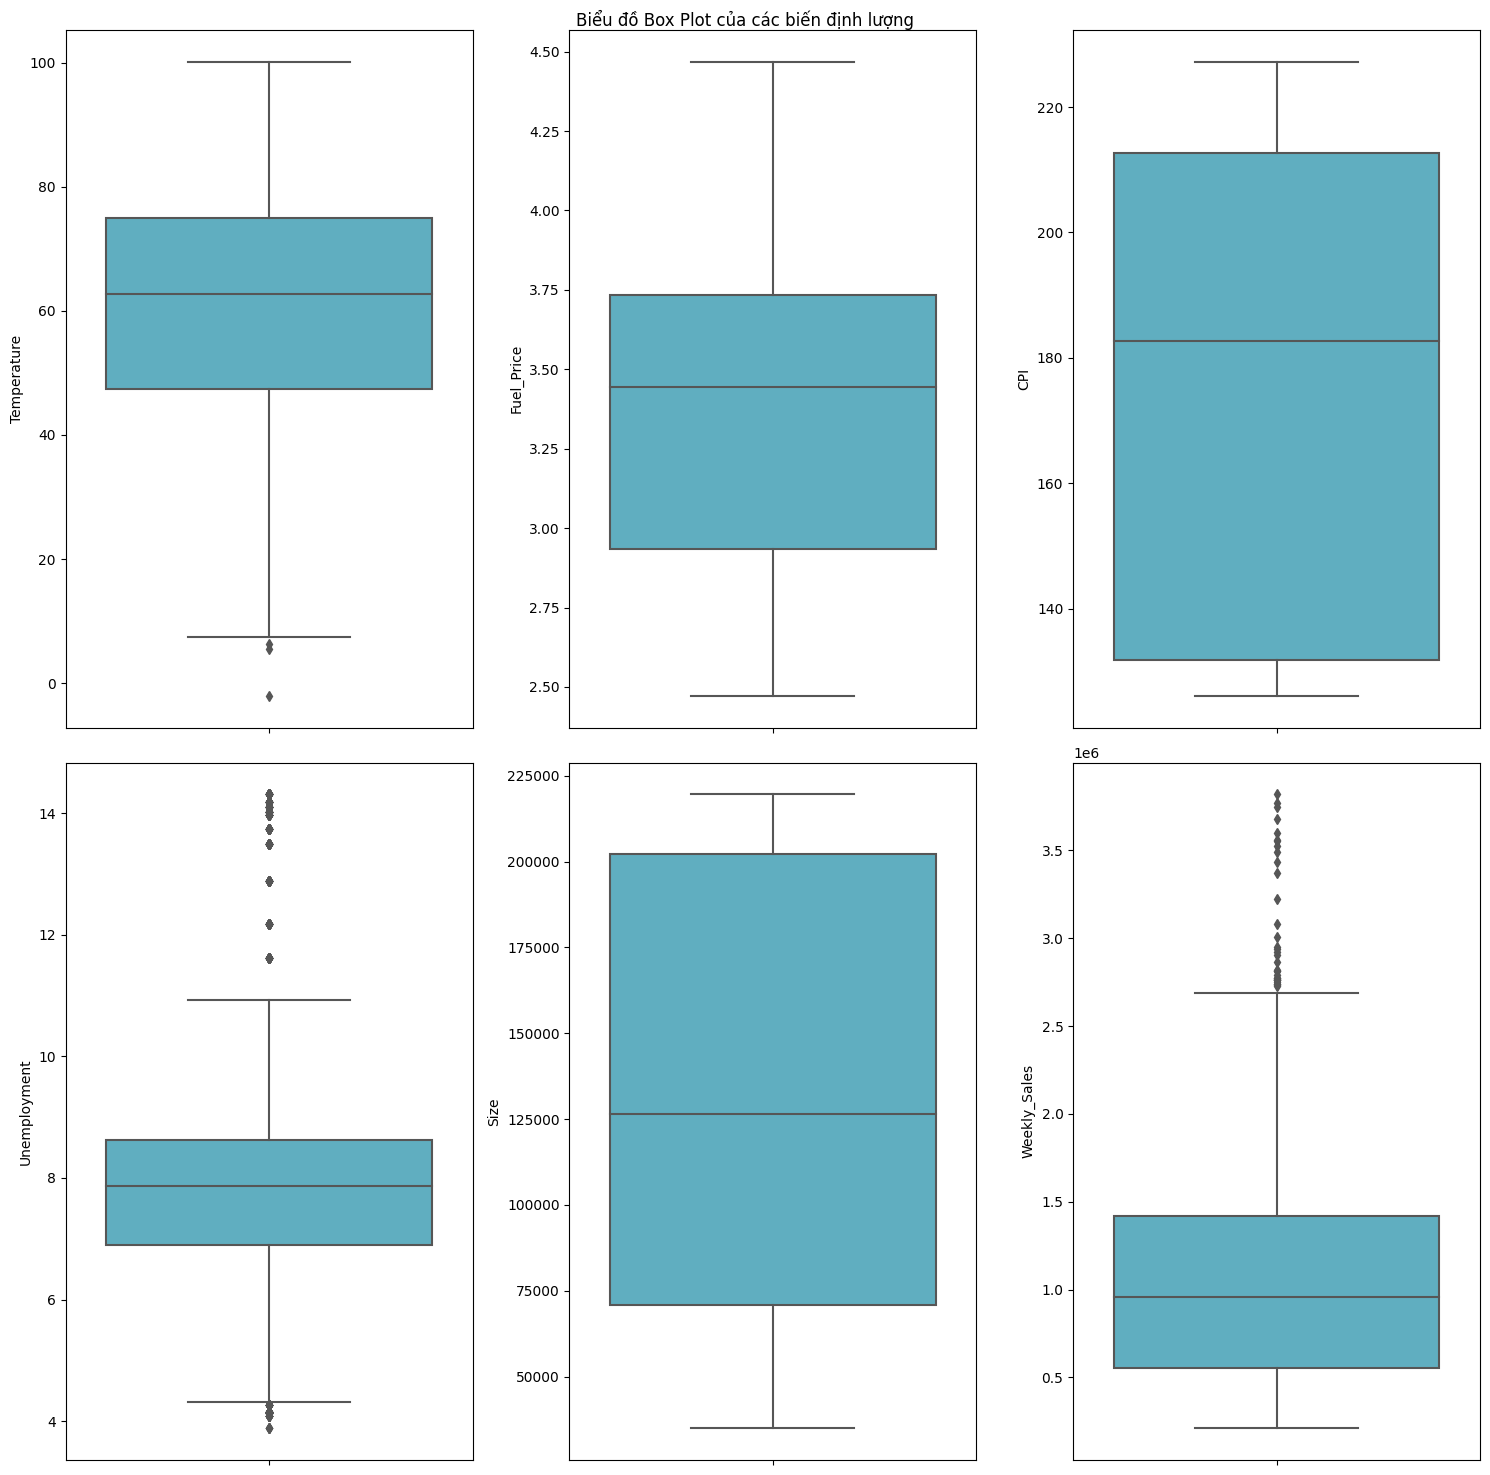

In [ ]:
#Kiểm tra outliers bằng biểu đồ box plot
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_data.columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(data=num_data, y=col, ax=ax,color='#50b8d0')
plt.suptitle('Biểu đồ Box Plot của các biến định lượng')
plt.tight_layout()
plt.show()

**Nhìn vào biểu đồ, ta có thể rút ra kết luận: 2 biến "Unemployment" và "Weekly_Sales" có chứa outliers và cần loại bỏ.**

In [ ]:
# Tính z-score cho các biến định lượng và loại bỏ các quan sát có z-score lớn hơn 3
num_column = ["Temperature","Fuel_Price","CPI","Unemployment","Size","Weekly_Sales"]
z_scores = (main_data[num_column] - main_data[num_column].mean()) / main_data[num_column].std()
final_data = main_data[(z_scores.abs() < 3).all(axis=1)]
final_data

,Store,Date,Type,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales
0,1,2010-02-05,A,42.31,2.572,211.096358,8.106,151315,0,1643690.90
1,1,2010-02-12,A,38.51,2.548,211.242170,8.106,151315,1,1641957.44
2,1,2010-02-19,A,39.93,2.514,211.289143,8.106,151315,0,1611968.17
3,1,2010-02-26,A,46.63,2.561,211.319643,8.106,151315,0,1409727.59
4,1,2010-03-05,A,46.50,2.625,211.350143,8.106,151315,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,B,64.88,3.997,192.013558,8.684,118221,0,713173.95
6431,45,2012-10-05,B,64.89,3.985,192.170412,8.667,118221,0,733455.07
6432,45,2012-10-12,B,54.47,4.000,192.327265,8.667,118221,0,734464.36
6433,45,2012-10-19,B,56.47,3.969,192.330854,8.667,118221,0,718125.53


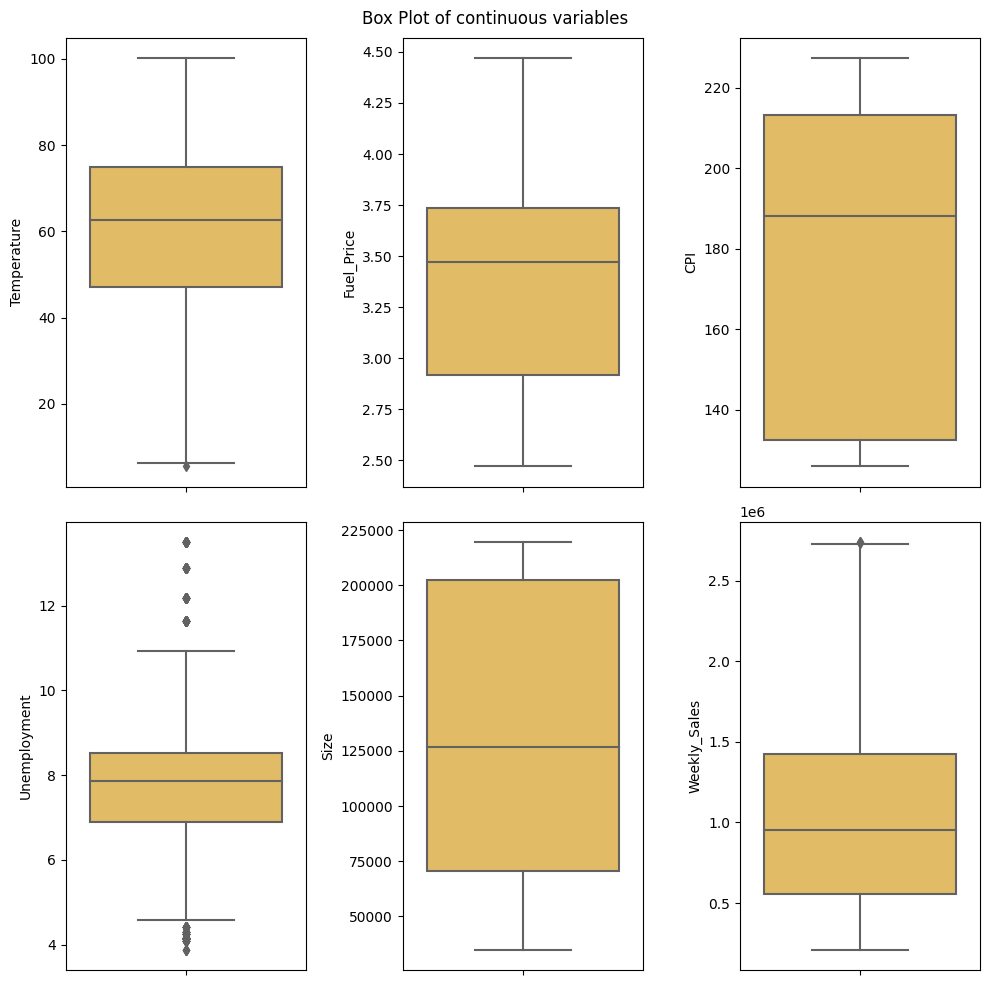

In [ ]:
#Kiểm tra lại bằng box plot
plt.figure(figsize=(10, 10))
for i, col in enumerate(final_data[num_column]):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(2,3, i+1)
    sns.boxplot(data=final_data, y=col, ax=ax,color='#f5c351')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()
plt.show()

In [ ]:
# Dataset sau khi đã lọc
final_data

,Store,Date,Type,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales
0,1,2010-02-05,A,42.31,2.572,211.096358,8.106,151315,0,1643690.90
1,1,2010-02-12,A,38.51,2.548,211.242170,8.106,151315,1,1641957.44
2,1,2010-02-19,A,39.93,2.514,211.289143,8.106,151315,0,1611968.17
3,1,2010-02-26,A,46.63,2.561,211.319643,8.106,151315,0,1409727.59
4,1,2010-03-05,A,46.50,2.625,211.350143,8.106,151315,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,B,64.88,3.997,192.013558,8.684,118221,0,713173.95
6431,45,2012-10-05,B,64.89,3.985,192.170412,8.667,118221,0,733455.07
6432,45,2012-10-12,B,54.47,4.000,192.327265,8.667,118221,0,734464.36
6433,45,2012-10-19,B,56.47,3.969,192.330854,8.667,118221,0,718125.53


In [ ]:
# Số quan sát có outliers bị loại bỏ
main_data.shape[0]-final_data.shape[0]

250

***Như vậy đã có 250 quan sát đã được xóa vì chứa outliers.***

In [ ]:
final_data.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales
count,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6.185000e+03
mean,22.947292,60.535995,3.361400,173.204274,7.786795,130373.647858,0.068876,1.042226e+06
std,13.052033,18.446078,0.461744,39.134368,1.518386,62857.102522,0.253264,5.497103e+05
min,1.000000,5.540000,2.472000,126.064000,3.879000,34875.000000,0.000000,2.099862e+05
25%,11.000000,47.190000,2.917000,132.614193,6.885000,70713.000000,0.000000,5.550753e+05
50%,23.000000,62.660000,3.473000,188.063234,7.852000,126512.000000,0.000000,9.557663e+05
75%,34.000000,74.850000,3.738000,213.190421,8.523000,202307.000000,0.000000,1.424500e+06
max,45.000000,100.140000,4.468000,227.232807,13.503000,219622.000000,1.000000,2.740057e+06


**Bộ dữ liệu hoàn chỉnh mà nhóm sẽ sử dụng "final_data"**

**Với bộ dữ liệu như trên, nhóm 9 sẽ dự báo doanh thu 45 cửa hàng của Walmart trong giai đoạn 2/11/2012 đến 26/7/2013.**

# <font color="#1b74cc">4. Phân tích khám phá dữ liệu - EDA </font><!-- omit in toc -->

## <font color="#f5c351">4.1. Biến định tính </font>





In [ ]:
# Tạo ra bảng chỉ gồm các biến định tính
cat_data = final_data.drop(['Temperature','Fuel_Price','CPI','Unemployment','Size'],axis = 1)
cat_data.reset_index()

,index,Store,Date,Type,IsHoliday,Weekly_Sales
0,0,1,2010-02-05,A,0,1643690.90
1,1,1,2010-02-12,A,1,1641957.44
2,2,1,2010-02-19,A,0,1611968.17
3,3,1,2010-02-26,A,0,1409727.59
4,4,1,2010-03-05,A,0,1554806.68
...,...,...,...,...,...,...
6180,6430,45,2012-09-28,B,0,713173.95
6181,6431,45,2012-10-05,B,0,733455.07
6182,6432,45,2012-10-12,B,0,734464.36
6183,6433,45,2012-10-19,B,0,718125.53


### <font color="#50b8d0"> 4.1.1. Mô tả các biến định tính </font>

**Biến 'Date'**

In [ ]:
# Chuyển dữ liệu cột 'Date' sang định dạng Datetime
cat_data['Date'] = pd.to_datetime(cat_data['Date'], format='%Y-%m-%d')

# Thêm cột 'Month_Year' (bằng cách kết hợp thành phần tháng và năm)
cat_data['Month_Year'] = cat_data['Date'].dt.strftime('(%Y, %m)')
cat_data

,Store,Date,Type,IsHoliday,Weekly_Sales,Month_Year
0,1,2010-02-05,A,0,1643690.90,"(2010, 02)"
1,1,2010-02-12,A,1,1641957.44,"(2010, 02)"
2,1,2010-02-19,A,0,1611968.17,"(2010, 02)"
3,1,2010-02-26,A,0,1409727.59,"(2010, 02)"
4,1,2010-03-05,A,0,1554806.68,"(2010, 03)"
...,...,...,...,...,...,...
6430,45,2012-09-28,B,0,713173.95,"(2012, 09)"
6431,45,2012-10-05,B,0,733455.07,"(2012, 10)"
6432,45,2012-10-12,B,0,734464.36,"(2012, 10)"
6433,45,2012-10-19,B,0,718125.53,"(2012, 10)"


In [ ]:
# Nhóm data theo (Tháng_Năm), tính monthly rental, trả về dạng dataframe, sắp xếp theo thứ tự tăng dần (theo thời gian)
monthly_sales = (cat_data.groupby('Month_Year')['Weekly_Sales']
                 .sum()
                 .reset_index()
                 .sort_values('Month_Year')
                 .rename(columns={'Weekly_Sales': 'Monthly_Sales'}))
monthly_sales

,Month_Year,Monthly_Sales
0,"(2010, 02)",1.783441e+08
1,"(2010, 03)",1.710599e+08
2,"(2010, 04)",2.182086e+08
3,"(2010, 05)",1.762177e+08
4,"(2010, 06)",1.814865e+08
5,"(2010, 07)",2.199126e+08
6,"(2010, 08)",1.772900e+08
7,"(2010, 09)",1.671630e+08
8,"(2010, 10)",2.049394e+08
9,"(2010, 11)",1.769412e+08


**Biến 'Type'**

In [ ]:
# Nhóm biến Type
grouped = stores.groupby('Type').count()
grouped_type = grouped.reset_index()
grouped_type

,Type,Store,Size
0,A,22,22
1,B,17,17
2,C,6,6


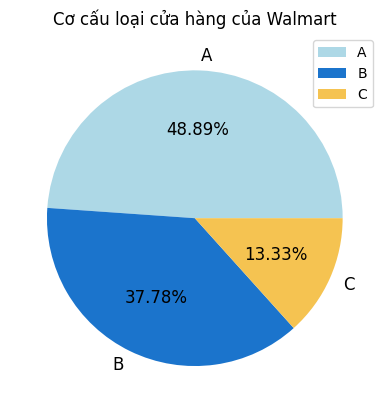

In [ ]:
# Vẽ biểu đồ tròn thể hiện cơ cấu loại cửa hàng của Walmart
colors = ['lightblue', '#1b74cc', '#f5c351']
plt.pie(grouped_type['Store'], labels=grouped_type['Type'],
        autopct='%.2f%%',
        textprops={'color': 'black', 'fontsize': 12},
        colors=colors)
plt.title('Cơ cấu loại cửa hàng của Walmart')
plt.legend(grouped_type['Type'], loc='best')
plt.show()

**Xét về cơ cấu 3 loại cửa hàng: Số cửa hàng loại A chiếm tỷ trọng lớn nhất 48.89% tổng số cửa hàng, cửa hàng loại B chiếm 37.78% và số cửa hàng loại C chiếm tỷ trọng nhỏ nhất**




**Biến "IsHoliday'**

In [ ]:
#  Số tuần chứa ngày lễ
holiday = main_data[main_data['IsHoliday'] == 1].drop_duplicates(subset='Date')
holiday_count = len(holiday)
print(holiday_count)

#  Số tuần là ngày bình thường
non_holiday = main_data[main_data['IsHoliday'] == 0].drop_duplicates(subset='Date')
non_holiday_count = len(non_holiday)
print(non_holiday_count)

10
133


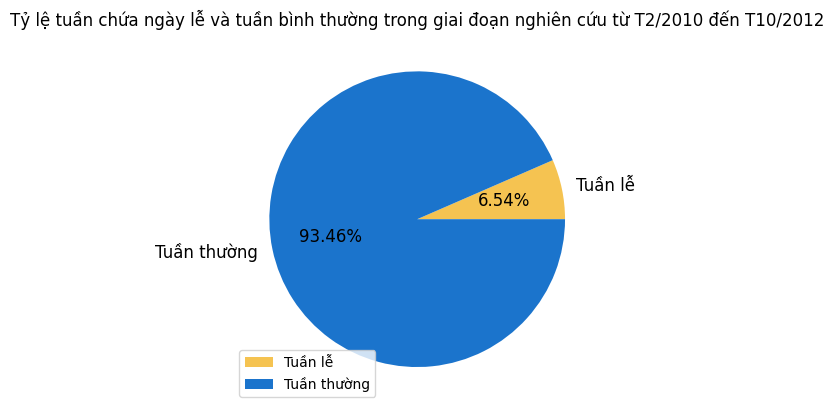

In [ ]:
# Vẽ biểu đồ tròn, thể hiện cơ cấu số tuần là tuần chứa ngày lễ và số tuần là tuần bình thường trong giai đoạn nghiên cứu
colors = ['#f5c351', '#1b74cc']
plt.pie([10,143], labels=['Tuần lễ','Tuần thường'],
        autopct='%.2f%%',
        textprops={'color': 'black', 'fontsize': 12},
        colors=colors)
plt.title('Tỷ lệ tuần chứa ngày lễ và tuần bình thường trong giai đoạn nghiên cứu từ T2/2010 đến T10/2012')
plt.legend(['Tuần lễ','Tuần thường'], loc='best')
plt.show()

**Khoảng thời gian nghiên cứu bao gồm 143 tuần, trong đó có khoảng 9 tuần có chứa ngày lễ và 134 tuần không chứa ngày lễ.**

### <font color="#50b8d0">4.1.2. Thống kê doanh thu theo các biến định tính </font>

**Doanh thu cả hệ thống siêu thị theo tháng**

<Figure size 1000x1000 with 0 Axes>

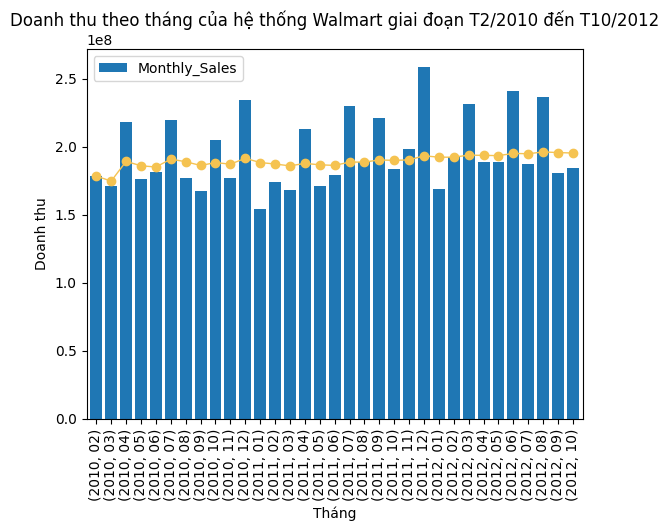

In [ ]:
# Biểu đồ doanh thu toàn hệ thống siêu thị theo tháng, đường màu đen là doanh thu trung bình tích lũy
plt.figure(figsize=(10, 10))

monthly_sales.plot(x='Month_Year',
                    y='Monthly_Sales',
                    kind='bar',
                    width=0.8)
plt.title('Doanh thu theo tháng của hệ thống Walmart giai đoạn T2/2010 đến T10/2012')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=90)
cumulative_sum = np.cumsum(monthly_sales['Monthly_Sales'])
cumulative_count = np.arange(1, len(monthly_sales['Month_Year']) + 1)
cumulative_average = cumulative_sum / cumulative_count
plt.plot(monthly_sales['Month_Year'], cumulative_average, color='#f5c351', marker='o', linestyle='-', linewidth=1, label='Doanh thu')

plt.show()

**Nhận xét:**

Biểu đồ phía trên mang lại cái nhìn toàn diện về doanh thu hàng tháng của hệ thống siêu thị Walmart và xu hướng chung của doanh thu trung bình tích lũy trong khoảng thời gian được nghiên cứu. Biểu đồ giúp người đọc dễ dàng nhìn thấy sự biến động của doanh thu hàng tháng và đánh giá mức độ ổn định và tăng trưởng của doanh thu trong giai đoạn đó.

- Tháng 12/2011 có lượng doanh thu lớn nhất trong tất cả các giai đoạn quan sát.
- Trong mỗi năm, tháng 12 luôn là tháng có doanh thu bán hàng cao nhất. Điều này có thể là do tháng 12 là thời điểm của các lễ hội và kỳ nghỉ cuối năm, bao gồm Giáng sinh và năm mới.
- Tháng 1/2011 có lượng doanh thu thấp nhất trong tất cả các giai đoạn quan sát. Trong mỗi năm, tháng 1 luôn là tháng có doanh thu bán hàng thấp nhất. Điều này có thể là do ​​người tiêu dùng thường tiêu tiền nhiều trong tháng 12 và có xu hướng tiết kiệm hơn trong tháng 1.
- Bên cạnh đó, tháng 4 và tháng 7 cũng thường có doanh thu cao hơn các tháng cùng năm. Doanh thu thưởng tăng vọt vào các tháng hè có thể do vào thời điểm này, khách hàng có nhu cầu mua sắm khi đi du lịch
- Doanh thu các tháng tương đối ổn định, khoảng 1-3 tháng doanh thu sẽ tăng mạnh một lần.
- Lượng doanh thu trung bình giữ ổn định xuyên suốt giai đoạn tháng 4/2010 tới tháng 10/2012.












**Doanh thu trung bình của các siêu thị phân loại theo tuần chứa ngày lễ và tuần bình thường**

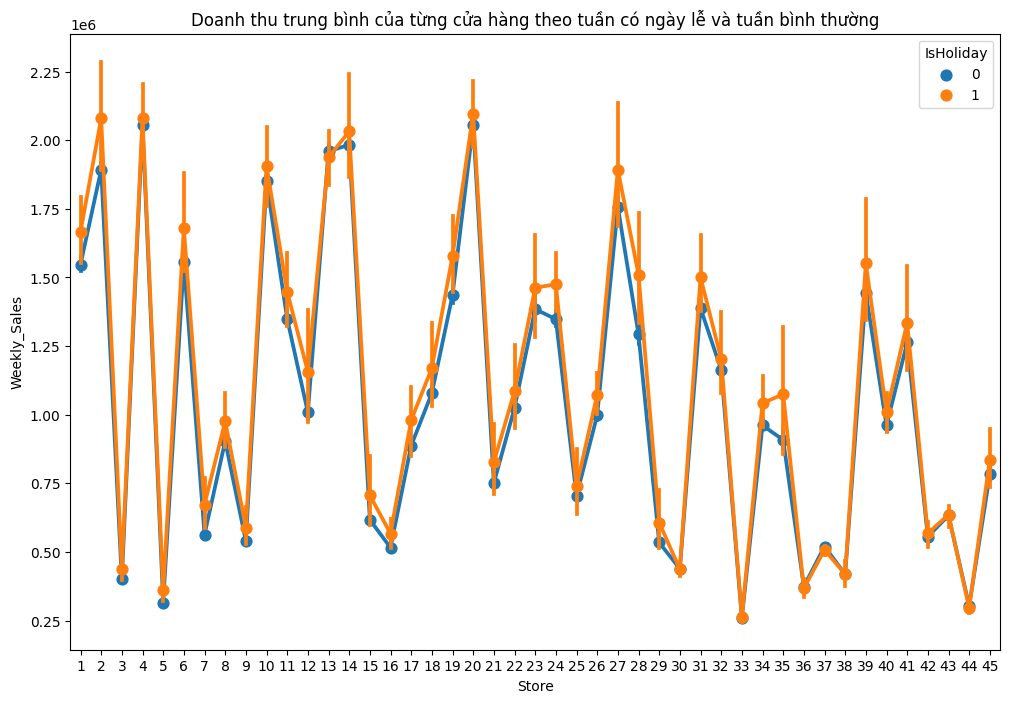

In [ ]:
# Biểu đồ điểm, thể hiện doanh thu trung bình thay đổi theo IsHoliday
plt.figure(figsize=(12, 8))
sns.pointplot(x='Store', y='Weekly_Sales', hue='IsHoliday', data=cat_data)
plt.title("Doanh thu trung bình của từng cửa hàng theo tuần có ngày lễ và tuần bình thường")
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")
plt.show()

**Nhận xét:**

Biểu đồ này cho thấy sự khác biệt trong doanh thu trung bình của các cửa hàng trong các tuần có ngày lễ và tuần bình thường. Từ đó, người đọc có thể cảm nhận trực quan mức độ tác động của ngày lễ đến doanh thu của từng cửa hàng:
- Doanh thu bán hàng vào những tuần có ngày lễ thường cao hơn những tuần bình thường, tuy nhiên đa số không lớn hơn đáng kể. Ngày lễ thường là thời điểm mọi người có thể có nhiều thời gian rảnh hơn để mua sắm và tiêu dùng. Điều này có thể dẫn đến lượng khách hàng tăng, đồng thời tăng cường hoạt động mua sắm của họ.
- Sự khác biệt trong doanh thu trung bình giữa tuần có ngày lễ và tuần bình thường của các cửa hàng là khác nhau. Một số cửa hàng có thể trải qua sự tăng trưởng đáng kể trong doanh thu trong các tuần có ngày lễ quan trọng, trong khi các cửa hàng khác có thể không có sự khác biệt đáng kể.
- Doanh thu lớn nhất thuộc về các cửa hàng 2, 4, 19.
- Doanh thu nhỏ nhất thuộc về các cửa hàng 5, 33, 44.
- Sự chênh lệch trong doanh thu trung bình giữa các cửa hàng có thể là do ra sự khác biệt trong mô hình hoạt động, vị trí địa lý hoặc các yếu tố khác ảnh hưởng đến doanh thu.


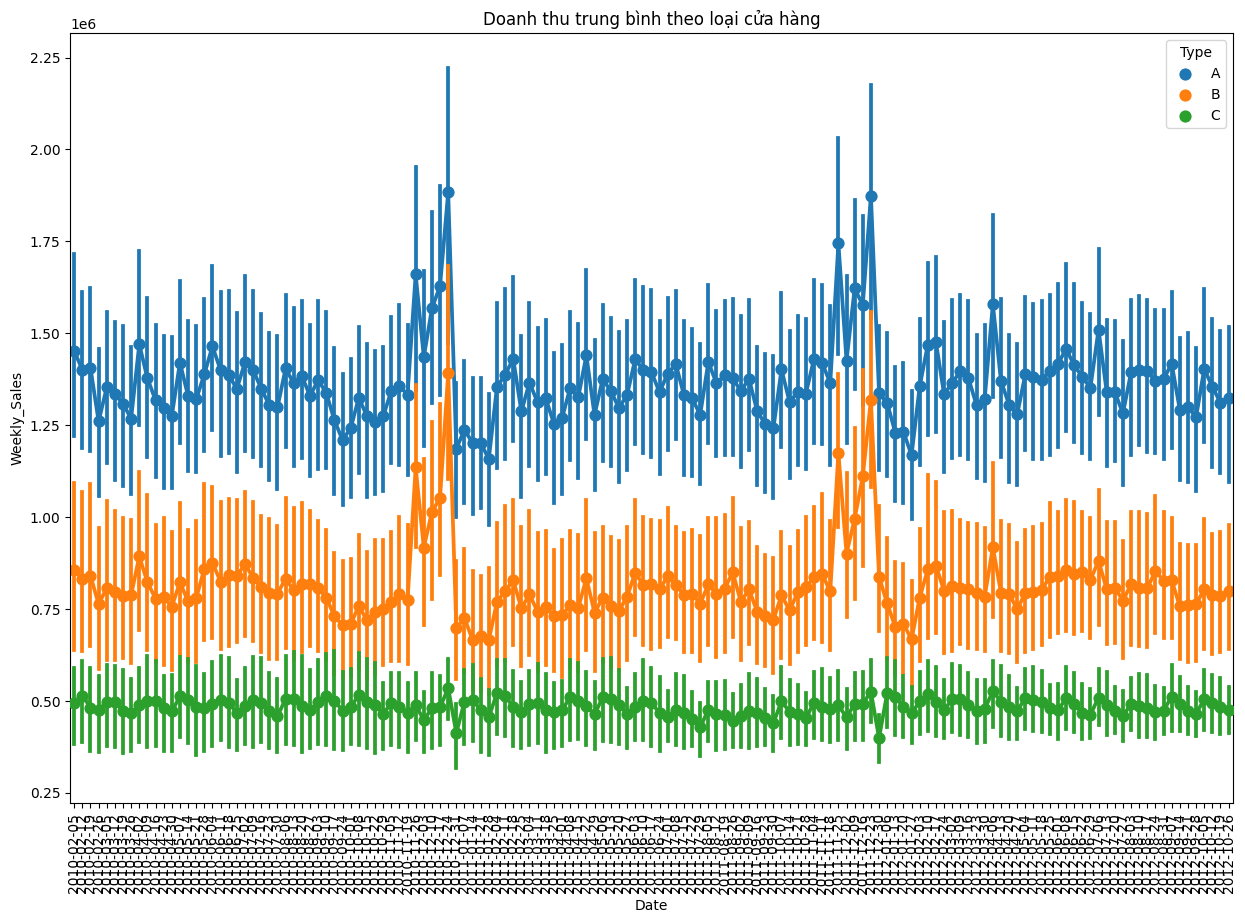

In [ ]:
# Biểu đồ điểm, thể hiện doanh thu trung bình qua từng tuần và phân theo loại cửa hàng
plt.figure(figsize=(15, 10))
if pd.api.types.is_datetime64_any_dtype(cat_data['Date']): # Chỉnh lại định dạng biến 'Date'
    cat_data['Formatted_Date'] = cat_data['Date'].dt.strftime('%Y-%m-%d')
    x_col = 'Formatted_Date'
else:
    x_col = 'Date'
sns.pointplot(x=x_col, y='Weekly_Sales', hue='Type', data=cat_data)
plt.title('Doanh thu trung bình theo loại cửa hàng')
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90,fontsize=10)
plt.show()

**Nhận xét:**
Nhóm nghiên cứu đã vẽ biểu đồ nêu trên nhằm minh họa doanh thu bán hàng của các cửa hàng theo loại cửa hàng.  Qua việc thể hiện thông tin về các loại cửa hàng A, B và C và doanh thu bán hàng của chúng, biểu đồ cho thấy sự khác biệt trong doanh thu bán hàng giữa các loại cửa hàng:
- Doanh thu bán hàng của cửa hàng loại A luôn lớn nhất, sau đó là loại B và ít nhất là loại C.
- Các cửa hàng đều có một xu hướng tăng giảm chung doanh thu vào một số ngày đặc biệt.
- Tuy nhiên, doanh thu của cả 3 cửa hàng đều giữ ở mức ổn định, không tăng và không giảm dần qua giai đoạn quan sát, chỉ ra sự không phát triển trong kinh doanh của các cửa hàng.
- Trong khoảng từ cuối tháng 11 đến hết Giáng Sinh, doanh thu của cửa hàng loại A và cửa hàng loại B đều có sự tăng trưởng đáng kể theo cùng xu hướng. Tuy nhiên, sự thay đổi trong doanh thu của cửa hàng loại C trong giai đoạn này là không đáng kể.
- Bên cạnh đó, cửa hàng loại C có doanh thu giảm vào ngày cuối năm.


## <font color="#f5c351"> 4.2. Biến định lượng </font>

### <font color="#50b8d0">4.2.1. Tính tương quan </font>

In [ ]:
# Tạo dữ liệu gồm các biến định lượng để khảo sát các biến
corr_data = final_data.drop(["Store","Date","Type","IsHoliday"],axis =1)
# Tính tương quan giữa các biến
correlation = corr_data.corr()
correlation

,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
Temperature,1.000000,0.149532,0.199412,0.075352,-0.088449,-0.042591
Fuel_Price,0.149532,1.000000,-0.183764,-0.025350,0.011075,0.016420
CPI,0.199412,-0.183764,1.000000,-0.224814,-0.016340,-0.083380
Unemployment,0.075352,-0.025350,-0.224814,1.000000,-0.087860,-0.096659
Size,-0.088449,0.011075,-0.016340,-0.087860,1.000000,0.821360
Weekly_Sales,-0.042591,0.016420,-0.083380,-0.096659,0.821360,1.000000


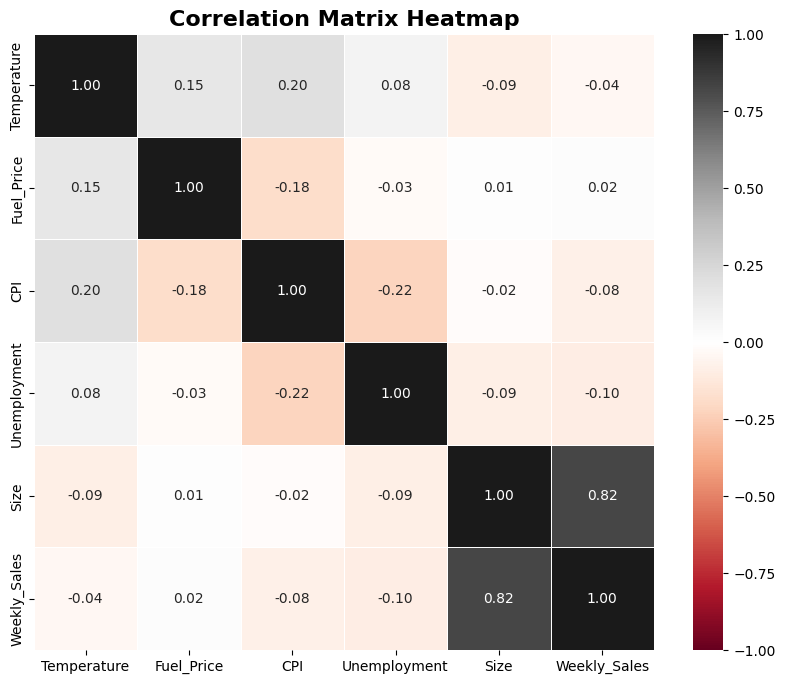

In [ ]:
# Vẽ biểu đồ nhiệt tương quan các biến
plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sns.heatmap(correlation, annot= True,
           cmap= 'RdGy',
           vmin= -1, vmax= 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f')
plt.show()

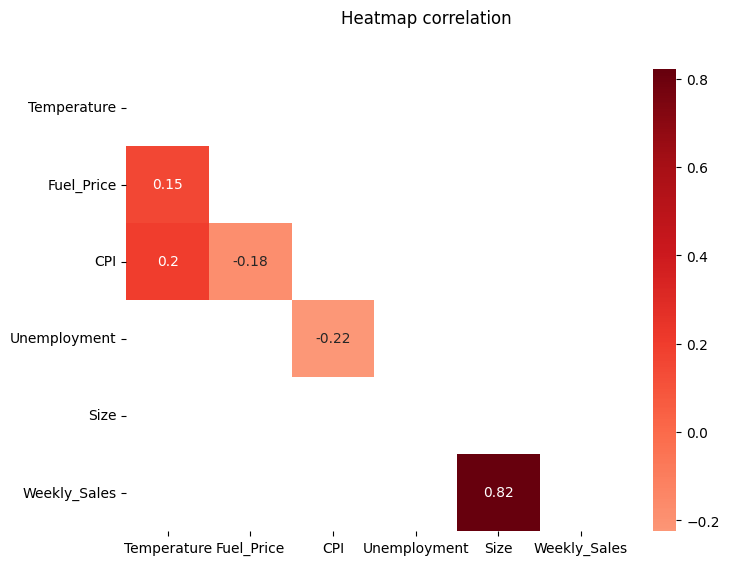

In [ ]:
#Biểu đồ nhiệt lọc ra tính tương quan có giá trị tuyệt đối lớn hơn hoặc bằng 0.1
plt.figure(figsize=(8,6))
sns.heatmap((correlation[(correlation>=0.1) |(correlation <=-0.1)]), mask=np.triu(correlation),annot=True,center = 0, cmap="Reds")
plt.suptitle('Heatmap correlation')
plt.show()

Nhóm nghiên cứu đã tiến hành xem xét sự tương quan giữa 6 biến định lượng đã lựa chọn là: “Temperature”, “Fuel_Price”, “CPI”, “Unemployment”, “Size”, “Weekly_Sales”. Sau khi chạy các câu lệnh về tìm tính tương quan, nhóm nghiên cứu đã có kết quả như 3 bảng được trình bày như trên.

Sau khi đã có đầy đủ thông tin và xem xét các dữ liệu một cách kỹ lượng, nhóm rút ra một số đánh giá như sau:
+ Hầu hết các biến được chọn không có quá nhiều tính tương quan chặt chẽ với nhau (tương quan ở mức yếu, giá trị tuyệt đối < 0.1)
+ Chỉ có 5 chỉ số tương quan được thống kê có giá trị tuyệt đối > 0.1
+ Một số biến có tương quan ở mức khá nhỏ, mặc dù có sự tương quan giữa biến “CPI” và “Temperature” (xấp xỉ 0.19) - “CPI” và “Unemployment” (xấp xỉ 0.22) ở mức trung bình nhưng điều này vẫn có nghĩa là các biến chưa thực sự có sự tương quan mật thiết với nhau
+ Duy chỉ có 2 biến “Size” và “Weekly_Sales” là cho thấy sự tương quan khá chặt chẽ với chỉ số tương quan cao xấp xỉ 0.82
+ Không có hai biến nào có sự tương quan tuyệt đối với nhau (= 1)
+ Hầu hết các biến có chỉ số tương quan nhỏ, chứng tỏ các biến ít ảnh hưởng với nhau theo mối quan hệ tuyến tính


### <font color="#50b8d0">4.2.2. Thống kê doanh thu theo các biến định lượng </font>

In [ ]:
# Chọn ra các biến định lượng từ "final data"
final_data
numerical_data = final_data.drop(['Type','IsHoliday'], axis = 1)
numerical_data

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
0,1,2010-02-05,42.31,2.572,211.096358,8.106,151315,1643690.90
1,1,2010-02-12,38.51,2.548,211.242170,8.106,151315,1641957.44
2,1,2010-02-19,39.93,2.514,211.289143,8.106,151315,1611968.17
3,1,2010-02-26,46.63,2.561,211.319643,8.106,151315,1409727.59
4,1,2010-03-05,46.50,2.625,211.350143,8.106,151315,1554806.68
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,64.88,3.997,192.013558,8.684,118221,713173.95
6431,45,2012-10-05,64.89,3.985,192.170412,8.667,118221,733455.07
6432,45,2012-10-12,54.47,4.000,192.327265,8.667,118221,734464.36
6433,45,2012-10-19,56.47,3.969,192.330854,8.667,118221,718125.53


In [ ]:
# Tổng doanh thu của hệ thống cửa hàng theo từng tuần
totalsales_by_date = numerical_data.groupby('Date').agg({'Weekly_Sales': 'sum', 'Temperature':'mean' ,'Fuel_Price': 'mean','CPI':'mean','Unemployment':'mean'}).reset_index()

totalsales_by_date

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,46619845.70,32.935000,2.700405,170.680086,8.236762
1,2010-02-12,45317630.91,33.171429,2.676024,170.777704,8.236762
2,2010-02-19,45363033.79,36.497619,2.654714,170.824929,8.236762
3,2010-02-26,41043557.90,38.458810,2.673857,170.863755,8.236762
4,2010-03-05,43813776.69,42.142143,2.712929,170.902581,8.236762
...,...,...,...,...,...,...
138,2012-09-28,43734899.40,68.754444,3.854578,176.373588,7.237333
139,2012-10-05,47566639.31,65.973111,3.845222,176.505052,6.953711
140,2012-10-12,46128514.25,58.342667,3.896733,176.636515,6.953711
141,2012-10-19,45122410.57,60.705333,3.880000,176.652613,6.953711


#### ***4.2.2.1. Mối quan hệ doanh thu theo nhiệt độ***

Text(0, 0.5, 'Doanh thu')

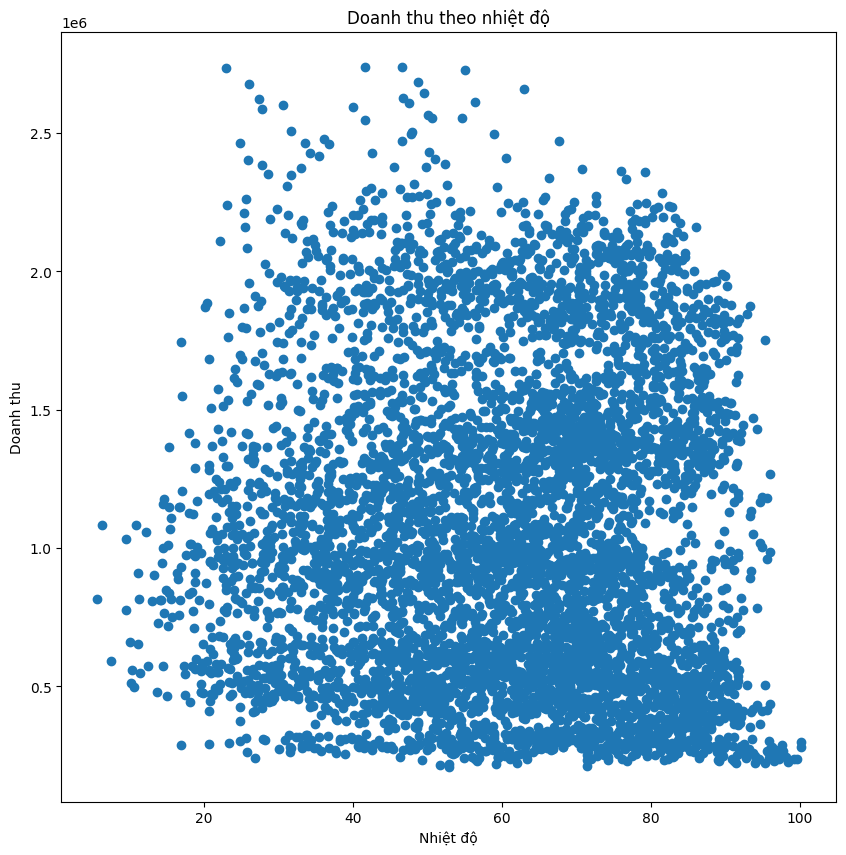

In [ ]:
#Vẽ đồ thị doanh thu theo tuần và nhiệt độ
## Sắp xếp biến 'Temperature' từ thấp tới cao
numerical_data_sortedt = numerical_data.sort_values('Temperature') #(đang nghĩ xem có cần dùng dòng này không, chắc là không)

## Vẽ đồ thị
plt.figure(figsize= (10,10))
plt.scatter(numerical_data_sortedt['Temperature'], numerical_data_sortedt['Weekly_Sales'])
plt.title("Doanh thu theo nhiệt độ")
plt.xlabel("Nhiệt độ")
plt.ylabel("Doanh thu")

Biểu đồ phân tán cho thấy mô tả mối quan hệ giữa nhiệt độ (trục hoành) và doanh thu (trục tung). Dữ liệu đại diện cho các cửa hàng Walmart có trong data set.

+ Nhiệt độ trên trục hoành dao động từ khoảng 0 đến 100 độ F, cho thấy rằng dữ liệu bao gồm một phạm vi rộng các điều kiện khí hậu.
+ Biểu đồ hiển thị mật độ dữ liệu cao ở nhiệt độ thấp, có thể ngụ ý rằng doanh thu bán hàng cao hơn trong điều kiện thời tiết mát mẻ.
+ Khó có thể nhận biết một xu hướng rõ ràng từ biểu đồ; các điểm dữ liệu phân bố rộng rãi, cho thấy mối tương quan yếu hoặc không tuyến tính giữa nhiệt độ và doanh thu.

#### ___4.2.2.2. Mối quan hệ doanh thu theo giá xăng___

Text(0, 0.5, 'Doanh thu')

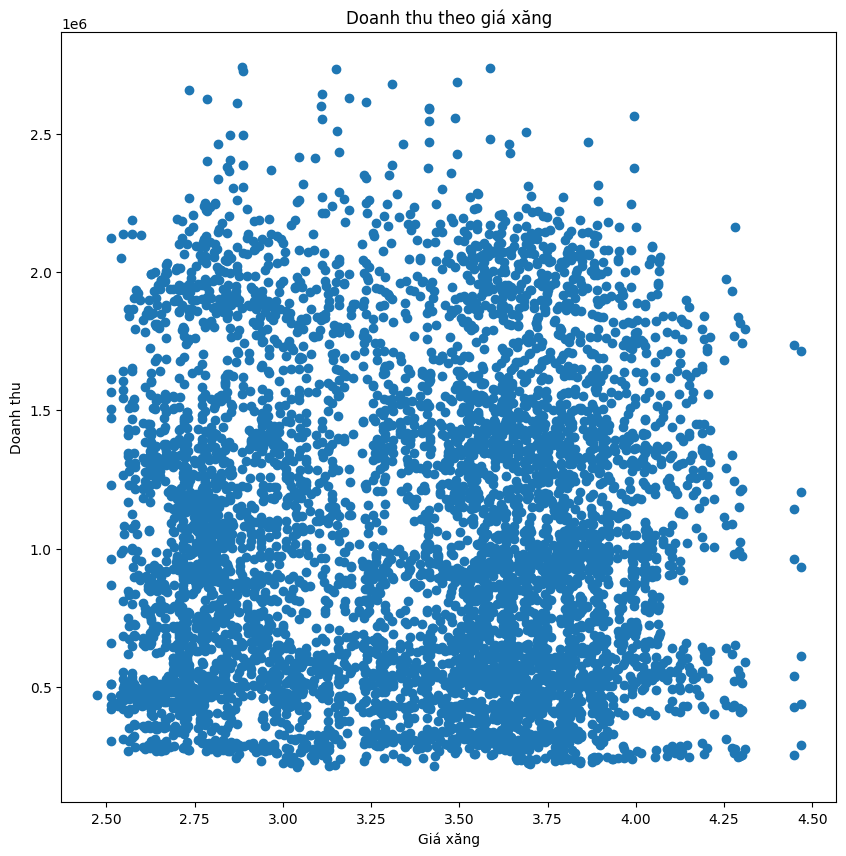

In [ ]:
#Vẽ đồ thị doanh thu theo tuần và giá xăng
plt.figure(figsize= (10,10))
plt.scatter(numerical_data_sortedt['Fuel_Price'], numerical_data_sortedt['Weekly_Sales'])
plt.title("Doanh thu theo giá xăng")
plt.xlabel("Giá xăng")
plt.ylabel("Doanh thu")

Hình ảnh cho thấy một biểu đồ phân tán mô tả mối quan hệ giữa giá xăng (trục hoành) và doanh thu (trục tung). Dữ liệu đại diện cho các cửa hàng Walmart có trong data set.
+ Theo đó, doanh thu của Walmart có xu hướng giảm khi giá xăng tăng (giá xăng tăng cao cũng có thể dẫn đến giảm cầu tiêu dùng chung).
+ Tuy nhiên, biểu đồ này chỉ thể hiện mối quan hệ giữa doanh thu và giá xăng một cách tương đối, có thể có những yếu tố khác ảnh hưởng đến doanh thu của Walmart
+ Từ biểu đồ, khó có thể nhận biết một xu hướng rõ ràng. Các điểm dữ liệu phân bố phân tán, cho thấy mối tương quan yếu hoặc không tuyến tính giữa giá xăng và doanh thu.

#### ***4.2.2.3. Mối quan hệ doanh thu theo CPI***

Text(0, 0.5, 'Doanh thu')

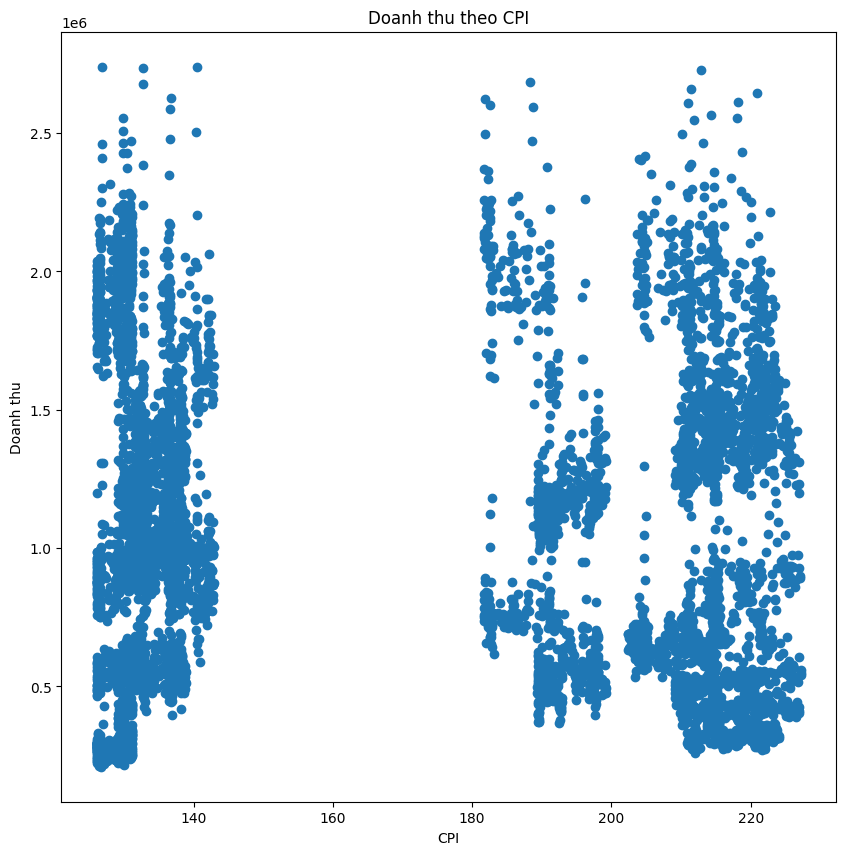

In [ ]:
#Vẽ đồ thị doanh thu theo tuần và nhiệt độ
plt.figure(figsize= (10,10))
plt.scatter(numerical_data_sortedt['CPI'], numerical_data_sortedt['Weekly_Sales'])
plt.title("Doanh thu theo CPI")
plt.xlabel("CPI")
plt.ylabel("Doanh thu")

Hình ảnh cho thấy một biểu đồ phân tán mô tả mối quan hệ giữa CPI (trục hoành) và doanh thu (trục tung). Dữ liệu đại diện cho các cửa hàng Walmart có trong data set.
+ Có thể thấy ngay một mảng khuyết không có doanh thu. Điều này có nghĩa là CPI có sự biến đổi theo ngày nhưng thay đổi rất nhỏ. Hay nói cách khác trong khoảng thời gian quan sát CPI không rơi vào khoảng từ 140 đến tầm 180.
+ Theo biểu đồ, doanh thu có xu hướng giảm khi CPI tăng. Điều này có thể được giải thích bởi việc người tiêu dùng sẽ cắt giảm chi tiêu khi giá cả chung tăng cao.  
+ Khó có thể nhận biết một xu hướng rõ ràng từ biểu đồ; các điểm dữ liệu phân bố phân tán, cho thấy mối tương quan yếu hoặc không tuyến tính giữa CPI và doanh thu.


#### ***4.2.2.4. Mối quan hệ doanh thu theo tỷ lệ thất nghiệp***

Text(0, 0.5, 'Doanh thu')

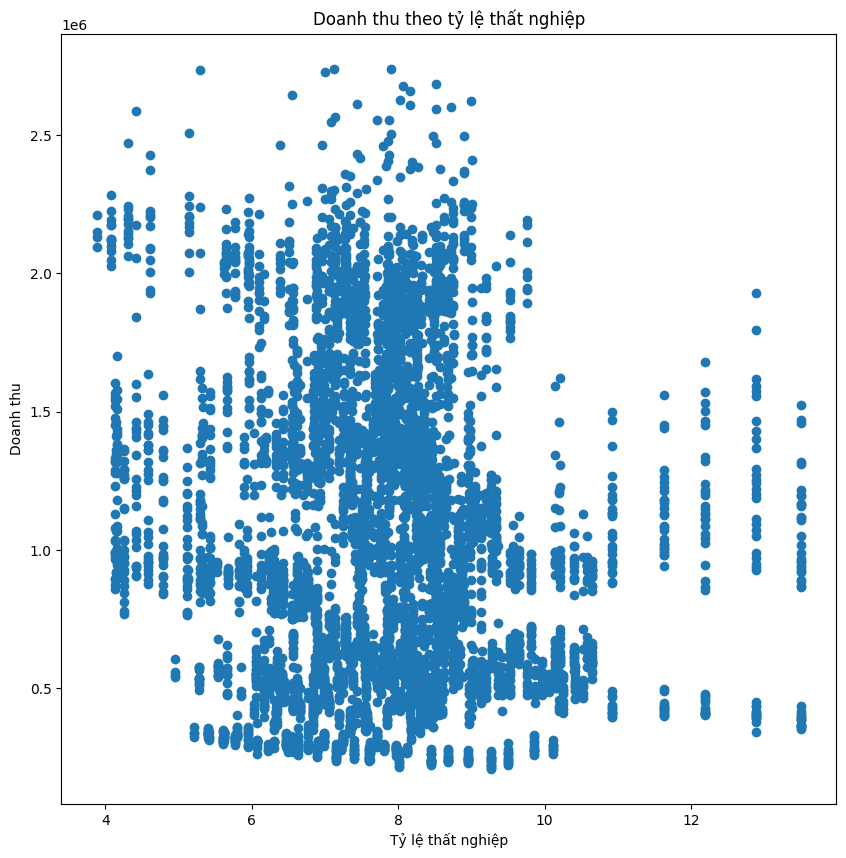

In [ ]:
#Vẽ đồ thị doanh thu theo tuần và tỷ lệ thất nghiệp
plt.figure(figsize= (10,10))
plt.scatter(numerical_data_sortedt['Unemployment'], numerical_data_sortedt['Weekly_Sales'])
plt.title("Doanh thu theo tỷ lệ thất nghiệp")
plt.xlabel("Tỷ lệ thất nghiệp")
plt.ylabel("Doanh thu")

Hình ảnh cho thấy một biểu đồ phân tán mô tả mối quan hệ giữa tỷ lệ thất nghiệp (trục hoành) và doanh thu (trục tung). Dữ liệu đại diện cho các cửa hàng Walmart có trong data set.
+ Theo biểu đồ, doanh thu có xu hướng giảm khi tỷ lệ thất nghiệp tăng. Điều này có thể được giải thích bởi việc người thất nghiệp có thu nhập thấp hơn và khả năng chi tiêu cũng thấp hơn.
+ Cần lưu ý rằng biểu đồ này chỉ thể hiện mối quan hệ giữa doanh thu và tỷ lệ thất nghiệp một cách tương đối.
+ Khó có thể nhận biết một xu hướng rõ ràng từ biểu đồ; các điểm dữ liệu phân bố phân tán, cho thấy mối tương quan yếu hoặc không tuyến tính giữa tỷ lệ thất nghiệp và doanh thu.


#### ***4.2.2.5. Mối quan hệ doanh thu theo độ lớn cửa hàng***

Text(0, 0.5, 'Doanh thu')

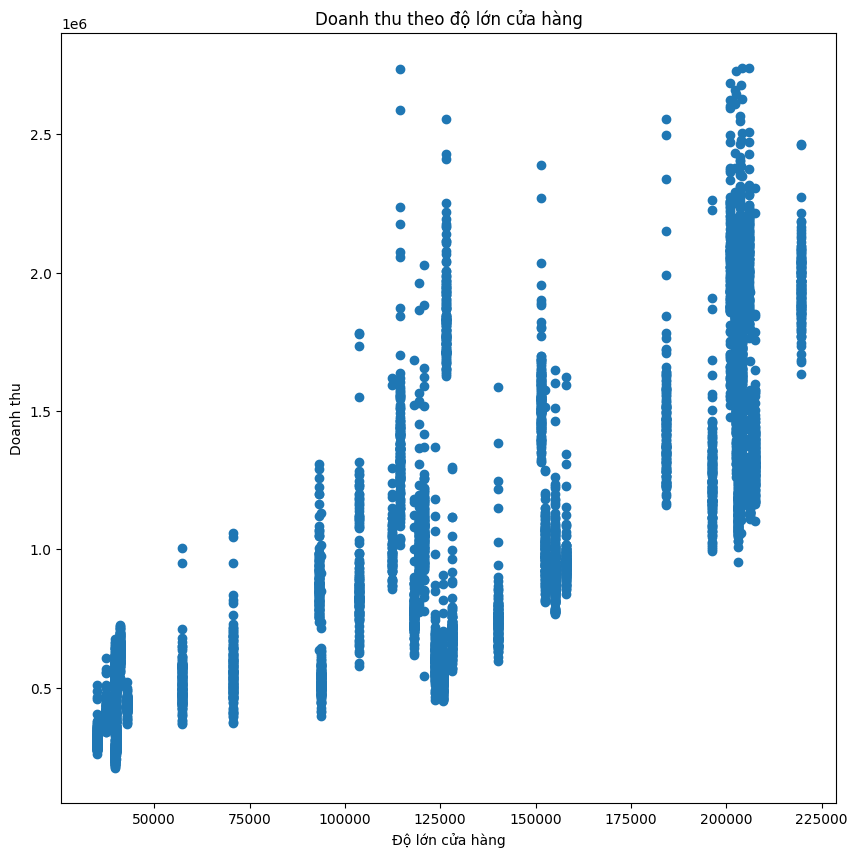

In [ ]:
#Vẽ đồ thị doanh thu theo tuần và độ lớn của cửa hàng
plt.figure(figsize= (10,10))
plt.scatter(numerical_data_sortedt['Size'], numerical_data_sortedt['Weekly_Sales'])
plt.title("Doanh thu theo độ lớn cửa hàng")
plt.xlabel("Độ lớn cửa hàng")
plt.ylabel("Doanh thu")

Hình ảnh cho thấy một biểu đồ phân tán mô tả mối quan hệ giữa độ lớn cửa hàng (trục hoành) và doanh thu (trục tung). Dữ liệu đại diện cho các cửa hàng Walmart có trong data set.
- Theo biểu đồ, doanh thu có xu hướng tăng khi độ lớn cửa hàng tăng (xu hướng đồng biến). Mức độ tăng doanh thu phụ thuộc vào độ lớn cửa hàng.
- Theo đó, nhóm nhận thấy có mối quan hệ tương quan chặt chẽ giữa doanh thu và giá xăng. Khi giá xăng tăng, doanh thu giảm và ngược lại.
- Có thể nhận biết một xu hướng khá rõ ràng từ biểu đồ, các điểm dữ liệu phân bố tập trung cho thấy mối tương quan khá cao.

# <font color="#1b74cc">5. Model Training </font>

Trong phần này, nhóm 9 sẽ sử dụng hàm ***train_test_split*** để chia bảng dữ liệu "final_data" thành 2 tập train và test với tỷ lệ 75/25.

Sau đó, nhóm khởi tạo các mô hình sau và sử dụng phương thức fit để huấn luyện mô hình trên 2 tập đã chia.

- Linear Regression
- Polynomial Regression
- Random Forest Regressor
- Extra Trees Regressor

Nhóm sẽ sử dụng 2 chỉ số "RMSE" và $R^2$ để lựa chọn mô hình tốt nhất

- RMSE: càng thấp càng tốt.
- $R^2$: càng cao càng tốt.

Đánh giá mô hình trên tập val sử dụng RMSE làm thang đo và chọn hyperpagram tốt nhất.

## <font color="#f5c351"> 5.1. Kiểm tra lựa chọn mô hình </font>

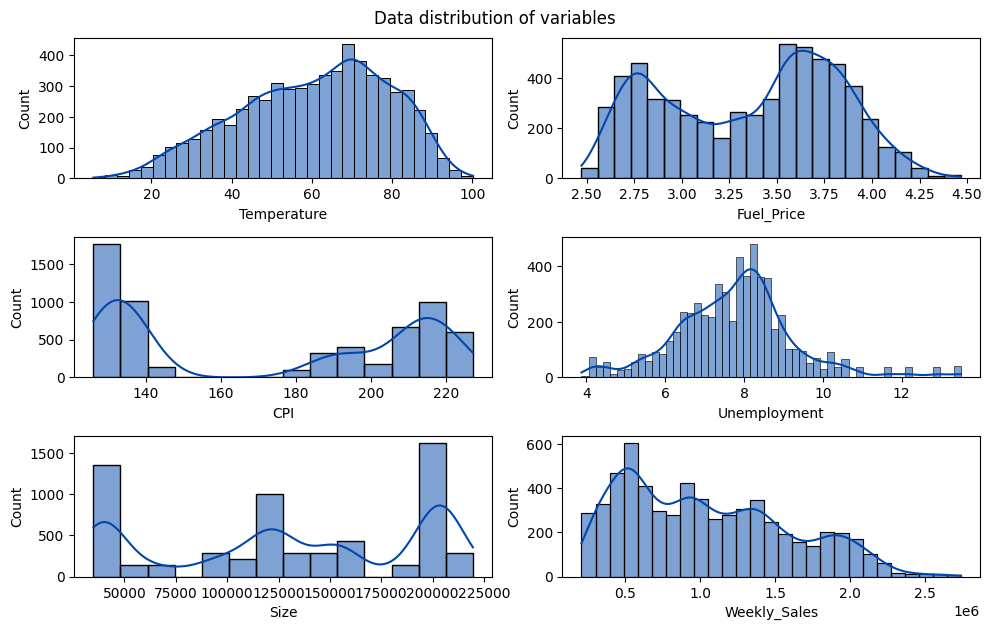

In [ ]:
# Bảng Phân phối của từng biến
plt.figure(figsize=(10, 10))
for i, col in enumerate(final_data[['Temperature', 'Fuel_Price', 'CPI','Unemployment', 'Size', 'Weekly_Sales']]):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=final_data, x=col, ax=ax,color='#0047AB',kde=True)
plt.suptitle('Data distribution of variables')
plt.tight_layout()

In [ ]:
final_data

,Store,Date,Type,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales
0,1,2010-02-05,A,42.31,2.572,211.096358,8.106,151315,0,1643690.90
1,1,2010-02-12,A,38.51,2.548,211.242170,8.106,151315,1,1641957.44
2,1,2010-02-19,A,39.93,2.514,211.289143,8.106,151315,0,1611968.17
3,1,2010-02-26,A,46.63,2.561,211.319643,8.106,151315,0,1409727.59
4,1,2010-03-05,A,46.50,2.625,211.350143,8.106,151315,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,B,64.88,3.997,192.013558,8.684,118221,0,713173.95
6431,45,2012-10-05,B,64.89,3.985,192.170412,8.667,118221,0,733455.07
6432,45,2012-10-12,B,54.47,4.000,192.327265,8.667,118221,0,734464.36
6433,45,2012-10-19,B,56.47,3.969,192.330854,8.667,118221,0,718125.53


In [ ]:
# Tạo b
final_data_dumm = pd.get_dummies(final_data, columns=["Type"])
final_data_dumm["Type_A"] = final_data_dumm["Type_A"].replace({True: 1, False: 0})
final_data_dumm["Type_B"] = final_data_dumm["Type_B"].replace({True: 1, False: 0})
final_data_dumm["Type_C"] = final_data_dumm["Type_C"].replace({True: 1, False: 0})
final_data_dumm

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Size,IsHoliday,Weekly_Sales,Type_A,Type_B,Type_C
0,1,2010-02-05,42.31,2.572,211.096358,8.106,151315,0,1643690.90,1,0,0
1,1,2010-02-12,38.51,2.548,211.242170,8.106,151315,1,1641957.44,1,0,0
2,1,2010-02-19,39.93,2.514,211.289143,8.106,151315,0,1611968.17,1,0,0
3,1,2010-02-26,46.63,2.561,211.319643,8.106,151315,0,1409727.59,1,0,0
4,1,2010-03-05,46.50,2.625,211.350143,8.106,151315,0,1554806.68,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,64.88,3.997,192.013558,8.684,118221,0,713173.95,0,1,0
6431,45,2012-10-05,64.89,3.985,192.170412,8.667,118221,0,733455.07,0,1,0
6432,45,2012-10-12,54.47,4.000,192.327265,8.667,118221,0,734464.36,0,1,0
6433,45,2012-10-19,56.47,3.969,192.330854,8.667,118221,0,718125.53,0,1,0


In [ ]:
# Lấy ra dữ liệu numeric để thực hiện normalize:
X=final_data_dumm.loc[:,['Temperature', 'Fuel_Price', 'CPI','Unemployment', 'Size','Type_A','Type_B','Type_C','IsHoliday']]
y=final_data_dumm.loc[:,['Weekly_Sales']]

# Chia dữ liệu thành tập train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, stratify=None)

### <font color="#50b8d0"> 5.1.1. Linear Regression </font>

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
reg.coef_

array([[ 1.28125758e+03, -2.89122305e+04, -2.52011591e+03,
        -5.90070614e+04,  7.98327437e+00, -7.11645205e+04,
        -5.38625853e+04,  1.25027106e+05,  8.32915264e+04]])

In [ ]:
# Điểm MAE của mô hình trên tập test
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
# Điểm MSE của mô hình trên tập test
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
# Điểm RMSE của mô hình trên tập test
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Điểm R^2 của mô hình trên tập test
print("R^2:", r2_score(y_test, y_pred))

MAE:  216714.42018749125
MSE:  76019804017.68309
RMSE:  275716.8910634296
R^2: 0.4593162435535124


### <font color="#50b8d0"> 5.1.2. Polynominal regression </font>

In [ ]:
reg=make_pipeline(StandardScaler(), PolynomialFeatures(degree=3),Ridge())
param_grid={'polynomialfeatures__degree':[2,3,4,5]}
grd=GridSearchCV(reg,param_grid,cv=4)
grd.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=3)),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4, 5]})

In [ ]:
y_pred = grd.predict(X_test)

In [ ]:
# Siêu tham số tốt nhất của mô hình trên tệp train
print("Best Parameters:", grd.best_params_)
# Điểm RMSE tốt nhất của mô hình trên tệp train
print("Best R_squared:", abs(grd.best_score_.round(4)))

Best Parameters: {'polynomialfeatures__degree': 2}
Best R_squared: 0.4493


In [ ]:
# Điểm MAE của mô hình trên tập test
print("MAE:", mean_absolute_error(y_test, y_pred))
# Điểm MSE của mô hình trên tập test
print("MSE:", mean_squared_error(y_test, y_pred))
# Điểm RMSE của mô hình trên tập test
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Điểm R^2 của mô hình trên tập test
print("R^2:", r2_score(y_test, y_pred))

MAE: 314593.6024110241
MSE: 233633024934.78976
RMSE:  483356.0022745034
R^2: -0.6616930704308863


**Có thể thấy rằng, tham số tốt nhất cho mô hình là bậc 2 và sẽ có giá trị $R^2$ trên tập train khá lớn. Tuy nhiên ở tập test thì giá trị $R^2$ nằm ngoài cả phạm vi từ 0 đến 1 và mang giá trị âm. Điều này cho thấy mô hình Polynomial không phù hợp để dùng cho dataset này**

### <font color="#50b8d0"> 5.1.3. Random Forest Regressor</font>

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
# Điểm MAE của mô hình trên tập test
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
# Điểm MSE của mô hình trên tập test
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
# Điểm RMSE của mô hình trên tập test
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Điểm R^2 của mô hình trên tập test
print("R^2:", r2_score(y_test, y_pred))

MAE:  238639.02505197152
MSE:  103880286690.76053
RMSE:  322304.64888170717
R^2: 0.2611611624829562


### <font color="#50b8d0"> 5.1.4. Extra Trees Regressor </font>


In [ ]:
etr_random_best = ExtraTreesRegressor(bootstrap=False, criterion="squared_error", max_depth=None,
                                      max_features="sqrt", max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=2, min_samples_split=5,
                                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=30,
                                      oob_score=False, random_state=None, warm_start=False)
etr_random_best.fit(X_train, y_train)

ExtraTreesRegressor(max_features='sqrt', min_samples_leaf=2,
                    min_samples_split=5, n_jobs=30)

In [ ]:
y_pred = etr_random_best.predict(X_test)

In [ ]:
# Điểm MAE của mô hình trên tập test
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
# Điểm MSE của mô hình trên tập test
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
# Điểm RMSE của mô hình trên tập test
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Điểm R^2 của mô hình trên tập test
print("R^2:", r2_score(y_test, y_pred))

MAE:  191487.54904906126
MSE:  62246569110.12946
RMSE:  249492.62335814553
R^2: 0.5572770905257531


**Dựa vào chỉ số của 4 mô hình trên, nhóm 9 sẽ sử dụng mô hình Extra Trees Regressor để dự báo doanh thu từng cửa hàng của Walmart.**

In [ ]:
# Print feature importances
importances = etr_random_best.feature_importances_
for i in range(len(importances)):
    print(f"Feature {i}: {importances[i]}")

Feature 0: 0.019492912330287403
Feature 1: 0.019129575992754486
Feature 2: 0.13189012579547538
Feature 3: 0.0717855408603194
Feature 4: 0.45629039609084354
Feature 5: 0.15582213795385325
Feature 6: 0.12725379697659253
Feature 7: 0.01646506116102649
Feature 8: 0.0018704528388475523


**Nhận xét về important score của 9 biến:**

- Feature 4 - Biến Size:
  - Biến quan trọng nhất trong mô hình, với mức độ quan trọng là 0.4563.
  - Chứng tỏ rằng ảnh hưởng của kích cỡ cửa hàng lên doanh thu cửa hàng là rất lớn.
- Feature 5 - Biến IsHoliday và Feature 6 - Biến Type_A
  - Những biến này cũng quan trọng với mô hình chỉ sau biến Size.
  - Điều này nói lên rằng tuần lễ và loại cửa hàng sẽ có tác động đáng kể đến doanh thu cửa hàng.
- Feature 2 - Biến CPI:
  - CPI có ảnh hưởng lên doanh thu theo tuần của cửa hàng nhưng ít ảnh hưởng hơn các biến trên.
- Các Feature còn lại tương ứng với các biến Temperature, Fuel_Price, Unemployment, Type_B và Type_C ít có ảnh hưởng nhất lên doanh thu (feature scores bé hơn 0.1).

## <font color="#f5c351"> 5.2. Chuẩn bị bộ dữ liệu test </font>


In [ ]:
# Group cột Store ở bảng dữ liệu "test", bỏ cột "Dept" bị thừa
test_1 = test.groupby(['Store', 'Date', 'IsHoliday']).count()
test_1=test_1.drop(['Dept'],axis=1).reset_index()

# Lọc bảng features và chỉ lấy các ngày trong khoảng 02/11/2012 đến 26/07/2013
start_date = '2012-11-02'
end_date = '2013-07-26'
selected_features = features[(features['Date'] >= start_date) & (features['Date'] <= end_date)]

# Hợp nhất "test_1" với "selected_features", bỏ các cột Markdown 1-5
test_2 = test_1.merge(selected_features, how="right", on=["Store","Date",'IsHoliday'])
test_3 = test_2.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"], axis=1)

# Thay biến IsHoliday thành kiểu boolean
test_3["IsHoliday"] = test_3["IsHoliday"].replace({True: 1, False: 0})

# Hợp nhất "test_3" với "stores" để lấy các cột Size và Type
test_4 = test_3.merge(stores, how="left", on = ['Store'])

# Tạo biến dummy cho cột Type
test_5 = pd.get_dummies(test_4, columns=["Type"])

# Di chuyển cột IsHoliday xuống cuối bảng để đồng nhất với model đã fit
columns = [col for col in test_5.columns if col != 'IsHoliday']
columns.append('IsHoliday')
test_5 = test_5[columns]

# Bỏ 2 biến "Store" và "Date" để chạy mô hình, sau khi chạy xong sẽ kết hợp lại
test_final = test_5.drop(['Store','Date'],axis=1)
test_final

,Temperature,Fuel_Price,CPI,Unemployment,Size,Type_A,Type_B,Type_C,IsHoliday
0,55.32,3.386,223.462779,6.573,151315,1,0,0,0
1,61.24,3.314,223.481307,6.573,151315,1,0,0,0
2,52.92,3.252,223.512911,6.573,151315,1,0,0,0
3,56.23,3.211,223.561947,6.573,151315,1,0,0,1
4,52.34,3.207,223.610984,6.573,151315,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1750,76.05,3.639,NaN,NaN,118221,0,1,0,0
1751,77.50,3.614,NaN,NaN,118221,0,1,0,0
1752,79.37,3.614,NaN,NaN,118221,0,1,0,0
1753,82.84,3.737,NaN,NaN,118221,0,1,0,0


## <font color="#f5c351"> 5.3. Sử dụng Extra Trees Regressor để dự báo </font>

In [ ]:
y_final_pred = etr_random_best.predict(test_final)

ValueError: ignored

In [ ]:
# Tính số giá trị bị thiếu của từng biến
na_value_count = test_final.isna().sum()
print(na_value_count)

Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
Size              0
Type_A            0
Type_B            0
Type_C            0
IsHoliday         0
dtype: int64


**Nhóm nhận ra không thể sử dựng mô hình Extra Trees Regressor nếu bộ dữ liệu cần dự báo có chứa giá trị Missing Values.**

Vì vậy, tiếp theo nhóm 9 sẽ sử dụng phương pháp imputation cho các giá trị bị thiếu bằng giá trị trung vị (median). Vì 2 biến "CPI" và "Unemployment" là biến định lượng và không có phân phối chuẩn nên phương pháp lấy giá trị trung vị là tốt nhất.

In [ ]:
# Import thư viện SimpleImputer
from sklearn.impute import SimpleImputer

# Tạo imputer với strategy = median
imputer = SimpleImputer(strategy='median')

# Bởi tệp train không có giá trị bị thiếu, nên cần fit imputer cho tệp train trước
imputer.fit(X_train)

# Áp dụng imputer cho "test_final"
test_final_imputed = imputer.transform(test_final)

In [ ]:
# Dự đoán kết quả cho test_final_imputed
y_final_pred = etr_random_best.predict(test_final_imputed)
result=pd.DataFrame(y_final_pred)

# Thêm lại 2 cột "Date" và "Store", Đổi tên cột sale dự báo được
columns_add = test_5[['Store', 'Date']]
result1 = pd.concat([result, columns_add], axis=1)
final_result = result1.rename(columns={0: 'Forecasted_Sale'})

final_result

,Forecasted_Sale,Store,Date
0,1.486988e+06,1,2012-11-02
1,1.494372e+06,1,2012-11-09
2,1.487040e+06,1,2012-11-16
3,1.525911e+06,1,2012-11-23
4,1.497599e+06,1,2012-11-30
...,...,...,...
1750,7.549927e+05,45,2013-06-28
1751,7.543541e+05,45,2013-07-05
1752,7.505312e+05,45,2013-07-12
1753,7.695235e+05,45,2013-07-19


**Dự báo doanh thu của 45 cửa hàng Walmart theo tuần, trong khoảng 02/11/2012 đến 26/07/2013**

In [ ]:
pip install openpyxl
file_name = "Nhóm 9_Forecasted Sales.xlsx"
final_result.to_excel(file_name, engine='openpyxl', index=False)

SyntaxError: ignored

# <font color="#1b74cc">6. Kết Luận </font>
Trong project này, nhóm thực hiện xác định các yếu tố ảnh hưởng đến doanh thu bán hàng và dự báo doanh thu dựa trên tập dữ liệu gồm 45 cửa hàng Walmart ở các khu vực khác nhau. Nhóm lựa chọn sử dụng phương pháp Extra Trees Regressor để dự báo sales của Walmart dựa trên các biến độc lập. Kết quả cho thấy phương pháp Extra Trees Regressor có thể dự báo sales của Walmart tương đối chính xác với hệ số xác định là 0.56.

Trong quá trình thực hiện nghiên cứu, nhóm 9 đã xác định được các yếu tố có tác động lên doanh thu bán hàng của Walmart, theo thứ tự tác động từ mạnh đến yếu là:

- Size (kích cỡ cửa hàng).
- Isholiday (tuần lễ).
- Type_A (cửa hàng loại A)
- CPI (chỉ số giá tiêu dùng)
- Unemployment (tỷ lệ thất nghiệp)
- Temperature (nhiệt độ)
- Type_B (cửa hàng loại B)
- Type_C (cửa hàng loại C)

Tuy nhiên nhóm đã lưu ý rằng biến Type_A, Type_B và Type_C là các trường hợp của biến phân loại cửa hàng và loại trừ lẫn nhau (mỗi quan sát chỉ có thể thuộc một loại). Vì thế, 1 loại có sự quan trọng thấp không nhất thiết là nó không quan trọng mà là đang so sánh với các loại khác trong tập dữ liệu và mô hình cụ thể của nhóm.

Từ kết quả của project, nhóm cho rằng dự báo doanh thu của Walmart là một bài toán phức tạp và thú vị, đòi hỏi sự kết hợp của nhiều phương pháp và kỹ năng phân tích dữ liệu. Project không tránh khỏi một vài thiếu sót do nhóm chưa thực sự thuần thục trong việc vận dụng linh hoạt các công cụ đã được học.

Project này đã mang lại cho nhóm nhiều kinh nghiệm bổ ích. Thông qua vận dụng kiến thức đã học và tìm tòi them để giải quyết một bài toán thực tế, nhóm không chỉ được củng cố và nâng cao kiến thức, mà còn phát triển được sự hứng thú với lĩnh vực phân tích dữ liệu.

# <font color="#1b74cc">7. Danh Mục Tài Liệu Tham Khảo </font>
1. HR, G and Aithal, P. S. and P, Kirubadevi, Impact of Store Size Reduction on Overall Store Performance – Insights from an Experiment (2020). International Journal of Case Studies in Business, IT, and Education (IJCSBE), 4(1), 103-111. May 2020. https://ssrn.com/abstract=3602705

2. Nilsson, Elin & Gärling, Tommy & Marell, Agneta & Nordvall, Anna-Carin. (2015). Who shops groceries where and how? – the relationship between choice of store format and type of grocery shopping. The International Review of Retail. https://doi.org/10.1080/09593969.2014.940996

3. Federal Reserve Bank of San Francisco. (2022). Impact of Weather on Retail Sales. Economic Letter. https://www.frbsf.org/economic-research/publications/economic-letter/2022/august/impact-of-weather-on-retail-sales/

4. National Bureau of Economic Research. (2007). The Impact of the Corporate Leniency Program on Cartel Formation and the Cartel Price Path. https://www.nber.org/system/files/working_papers/w13614/w13614.pdf

5. Shopify. (2022). Inflation in Retail: What It Is, Why It Happens, and How to Make it Work For You. https://www.shopify.com/retail/inflation-in-retail

6. Richter, F. (2023). How Important is the Holiday Season for U.S. Retailers?
https://www.statista.com/chart/11979/holiday-season-retail-sales/

7. Movshovich, I. (2020). The Relationship Between Unemployment and Grocery Purchasing.
